Notebook elaborado para estudar os fundamentos da estimativa de velocidades através da análise de dados sísmicos de refração e de reflexão.
Criado para a disciplina Geofísica II da Universidade Federal de Uberlândia.
O uso e a reprodução são livres para fins educacionais, pede-se apenas a citação da fonte.

[![License: GPL v3](https://img.shields.io/badge/License-GPLv3-blue.svg)](https://www.gnu.org/licenses/gpl-3.0)

Esta demonstração utiliza dados adaptados de Milkereit et al. (1985) e de Chen et al. (2018).


Prof. Dr. Emerson Rodrigo Almeida<br>
Universidade Federal de Uberlândia<br>
Instituto de Geografia - Curso de Geologia<br>
emerson.almeida@ufu.br<br>

<p>&nbsp;</p>
Última modificação: 30/05/2021

---
### Referências

CHEN, S.; JIN, S.; LI, X. Y.; YANG, W. Nonstretching normal-moveout correction using a dynamic time warping algorithm. **Geophysics**, v. 83, n. 1, p. V27-V37, 2018.

MILKEREIT, B.; MOONEY, W. D.; KOHLER, W. M. Inversion of seismic refraction data in planar dipping structure. **Geophys. J. R. Astr. Soc.**, v. 82, n. 1, p. 81-103, 1985.

---

<p>&nbsp;</p>

# Instruções iniciais

Neste notebook você irá estimar a velocidade de camadas geológicas de interfaces plano paralelas em dados sísmicos. Para isto leia atentamente as instruções apresentadas antes de cada célula e execute-as uma a uma, para acompanhar o processo corretamente.

Não se preocupe em compreender o código em si, não é obrigatório que você conheça a programação para obter e interpretar os resultados da demonstração. Mesmo assim, sinta-se livre caso queira perguntar qualquer coisa para aprender mais sobre o código e sua elaboração.

<p>&nbsp;</p>

# Passo 01 - Preparação

Primeiramente vamos preparar o ambiente para a execução da demonstração. Importe os módulos e defina as funções que serão utilizadas no decorrer da demonstração. A célula abaixo contém as funções utilizadas nos cálculos e as funções utilizadas para gerar as figuras. Execute-a uma vez antes de executar qualquer outra parte do código e **não altere nada no código apresentado na célula** para não criar problemas na execução do código. Você pode executar o código na célula clicando sobre ela e em seguida clicando no botão **RUN** na barra do Jupyter Notebook ou pressionando as teclas **SHIFT+ENTER** no seu teclado. Se você preferir executar este notebook localmente, no seu computador, então exclua a célula abaixo para não afetar a sua instalação.

<p>&nbsp;</p>

**Importante!** Nem todas as células irão retornar algum tipo de mensagem ou figura após a execução. Isto é normal e não significa que a execução tenha falhado. Perceba o símbolo **In [   ]:** próximo ao canto superior esquerdo de cada célula. Ao iniciar a execução de uma delas você verá um asterisco ($*$) aparecer dentro dos colchetes. Você saberá que a execução ocorreu sem problemas quando o $*$ dentro dos colchetes for substituído por um número e nenhuma mensagem de erro aparecer abaixo da célula executada.

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')

def refracao_sintetico(v1, v2, z, n_tracos, dx=1.0):
    # velocidades em m/s
    
    xx = (np.arange(n_tracos)) * dx

    t_direto = xx / v1
    t_refletido = np.sqrt(4*z**2 + xx**2)/v1
    t_refratado = (xx/v2) + (  (2*z*np.sqrt(v2**2 - v1**2)) / (v1*v2)  )

    it_crit = np.abs(t_refletido - t_refratado).argmin()

    fig = plt.figure(figsize=(15,7))
    ax = plt.subplot(1,1,1)
    ax.plot(xx, t_direto*1e3, '-k', label='Ondas diretas', linewidth=2)
    ax.plot(xx, t_refletido*1e3, '-b', label='Ondas refletidas', linewidth=2)
    ax.plot(xx[it_crit:], t_refratado[it_crit:]*1e3, '-r', label='Ondas refratadas', linewidth=2)
    ax.plot(xx[:it_crit+1], t_refratado[:it_crit+1]*1e3, '--r', label='Projeção das\nondas refratadas', linewidth=2)
    ax.legend(loc='lower right', fontsize='12')
    ax.grid(which='both')

    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(2))

    ax.yaxis.set_major_locator(plt.MultipleLocator(10))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(2))

    ax.set_title('Tempos de chegada sintéticos')
    ax.set_xlabel('Distância (m)', fontsize=14)
    ax.set_ylabel('Tempo (ms)', fontsize=14)
    ax.set_xlim(xx[0], xx[-1])
    ax.set_ylim(0, 1e3*np.max(t_refletido))
    plt.show()


def refracao_real(v1, v2, z, reflexao=False):
    xx = np.linspace(0, 9, 101)
    t_direto = xx / v1
    t_refletido = np.sqrt(4*z**2 + xx**2)/v1
    t_refratado = (xx/v2) + (  (2*z*np.sqrt(v2**2 - v1**2)) / (v1*v2)  )
    ti = (2*z*np.sqrt(v2**2 - v1**2)) / (v1*v2)

    fig = plt.figure(figsize=(20, 9))
    ax = plt.subplot(1,1,1)
    img = plt.imread('sismograma.png')
    ax.imshow(img, extent=[0, 8.96, -0.10, 5.0])
    ax.plot(xx, t_direto, '-b', label='Ondas diretas', linewidth=3)
    ax.plot(xx, t_refratado, '-r', label='Ondas refratadas', linewidth=3)

    if reflexao:
        ax.plot(xx, t_refletido, '-y', label='Ondas refletidas', linewidth=3)

    ax.legend(loc='lower right', fontsize='12')

    ax.xaxis.set_major_locator(plt.MultipleLocator(1))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.2))

    ax.yaxis.set_major_locator(plt.MultipleLocator(1))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(0.2))

    ax.grid(which='both')
    ax.set_title('Tempos de chegada em dados reais')
    ax.set_xlabel('Distância (km)', fontsize=14)
    ax.set_ylabel('Tempo (s)', fontsize=14)
    ax.set_xlim([0, 7.4])
    ax.set_ylim([0, 4.0])

    plt.show()
    
    return v1, z
    
    
def t2x2(v1, z):
    
    xx = np.linspace(0, 9, 101)
    t_refletido = np.sqrt(4*z**2 + xx**2)/v1
    
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    ax1.plot(xx, t_refletido, linewidth=2)
    ax1.set_xlabel('Distância (km)', fontsize=14)
    ax1.set_ylabel('Tempo (s)', fontsize=14)
    ax1.set_title('Tempo duplo de trânsito', fontsize=14)
    ax1.xaxis.set_major_locator(plt.MultipleLocator(1))
    ax1.xaxis.set_minor_locator(plt.MultipleLocator(0.2))
    ax1.yaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax1.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
    ax1.grid(which='both')
    ax1.set_xlim([0, 7.4])
    ax1.set_ylim([0, 4.0])
    

    ax2.plot(xx**2, (t_refletido)**2, linewidth=2)
    ax2.set_xlabel(r'Distância$^{2}$ (km$^{2}$)', fontsize=14)
    ax2.set_ylabel(r'Tempo$^{2}$ (s$^{2}$)', fontsize=14)
    ax2.set_title(r'Método $t^{2}x^{2}$', fontsize=14)

    ax2.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax2.xaxis.set_minor_locator(plt.MultipleLocator(2))
    ax2.yaxis.set_major_locator(plt.MultipleLocator(2))
    ax2.yaxis.set_minor_locator(plt.MultipleLocator(0.5))

    ax2.grid(which='both')
    ax2.set_xlim([0, 7.4**2])
    ax2.set_ylim([0, 4.0**2])
    

    plt.show()
    
    
def reflexao_sintetico(v1, v2, v3, t01, t02, t03, n_tracos, dx=1.0):
    xx = (np.arange(n_tracos)+5) * dx
    v_intervalar = np.array([v1, v2, v3])    # m/s
    t0 = np.array([t01, t02, t03])               # s

    # -------

    n_interfaces = len(v_intervalar)
    v_rms = np.zeros(n_interfaces)

    for i in range(1, n_interfaces+1):
        v_rms[i-1] = np.sqrt(np.sum((v_intervalar[:i]**2) * t0[:i]) / np.sum(t0[:i]))
        
    t_refletido = np.zeros((n_interfaces, len(xx)))
    t_direto = xx / v_rms[0]

    for n in range(n_interfaces):
        t_refletido[n, :] = np.sqrt( t0[n]**2 + (xx / v_rms[n])**2 )

    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    cores = ['k', 'b', 'r']
    labels = ['Reflexão na camada 1', 'Reflexão na camada 2', 'Reflexão na camada 3']

    for n in range(n_interfaces):
        ax1.plot(xx, 1e3*(t_refletido[n, :]), c=cores[n], label=labels[n], linewidth=2)

    ax1.legend(loc='best', fontsize=12)
    ax1.set_xlabel(r'Distância (m)', fontsize=14)
    ax1.set_ylabel(r'Tempo (ms)', fontsize=14)
    ax1.set_title('Tempo de trânsito', fontsize=14)
    ax1.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax1.xaxis.set_minor_locator(plt.MultipleLocator(5))
    ax1.yaxis.set_major_locator(plt.MultipleLocator(10))
    ax1.yaxis.set_minor_locator(plt.MultipleLocator(2))
    ax1.set_xlim(xx[0], xx[-1])
    ax1.set_ylim(0, 1e3*np.max(t_refletido))
    ax1.grid(which='both')

    for n in range(n_interfaces):
        ax2.plot(xx**2, (1e3*t_refletido[n, :])**2, c=cores[n], label=labels[n], linewidth=2)

    ax2.legend(loc='best', fontsize=12)
    ax2.set_xlabel(r'Distância$^{2}$ (m$^{2}$)', fontsize=14)
    ax2.set_ylabel(r'Tempo$^{2}$ (ms$^{2}$)', fontsize=14)
    ax2.set_title(r'Método $t^{2}x^{2}$', fontsize=14)
    ax2.xaxis.set_major_locator(plt.MultipleLocator(1000))
    ax2.xaxis.set_minor_locator(plt.MultipleLocator(500))
    ax2.yaxis.set_major_locator(plt.MultipleLocator(200))
    ax2.yaxis.set_minor_locator(plt.MultipleLocator(50))
    ax2.set_xlim(xx[0]**2, xx[-1]**2)
    ax2.set_ylim(0, (1e3*np.max(t_refletido))**2)
    ax2.grid(which='both')
    
    
def reflexao_sismograma(v1, v2, v3, t01, t02, t03, n_tracos=81):
    xx = np.linspace(0, 3000, n_tracos)
    v_intervalar = np.array([v1, v2, v3])    # m/s
    t0 = np.array([t01, t02, t03])               # s
    
    n_interfaces = len(v_intervalar)
    v_rms = np.zeros(n_interfaces)

    for i in range(1, n_interfaces+1):
        v_rms[i-1] = np.sqrt(np.sum((v_intervalar[:i]**2) * t0[:i]) / np.sum(t0[:i]))

    t_refletido = np.zeros((n_interfaces, len(xx)))
    t_refratado = np.zeros((n_interfaces, len(xx)))
    t_direto = xx / v_rms[0]

    for n in range(n_interfaces):
        t_refletido[n, :] = np.sqrt( t0[n]**2 + (xx / v_rms[n])**2 )

    fig = plt.figure(figsize=(20,10))
    ax1 = plt.subplot(1,1,1)
    cores = ['blue', 'lightgreen', 'red']
    labels = ['Reflexão na camada 1', 'Reflexão na camada 2', 'Reflexão na camada 3']

    img = plt.imread('sismograma_reflexao.png')
    ax1.imshow(img, extent=[0, 3000, 1.4, 0.0], aspect='auto')
    for n in range(n_interfaces):
        ax1.plot(xx, t_refletido[n, :], c=cores[n], label=labels[n], linewidth=3)

    ax1.legend(loc='best', fontsize=14)
    ax1.set_xlabel(r'Distância (m)', fontsize=14)
    ax1.set_ylabel(r'Tempo (s)', fontsize=14)
    ax1.set_title('Tempo de trânsito', fontsize=14)
    ax1.set_ylim(1.4, 0.0)

    fig = plt.figure(figsize=(20,10))
    ax2 = plt.subplot(1,2,1)
    ax3 = plt.subplot(1,2,2)
    
    for n in range(n_interfaces):
        ax2.plot(xx, t_refletido[n, :], c=cores[n], label=labels[n], linewidth=2)

    ax2.legend(loc='upper left', fontsize=12)
    ax2.set_xlabel(r'Distância (m)', fontsize=14)
    ax2.set_ylabel(r'Tempo (s)', fontsize=14)
    ax2.set_title('Tempo de trânsito', fontsize=14)
    ax2.xaxis.set_major_locator(plt.MultipleLocator(500))
    ax2.xaxis.set_minor_locator(plt.MultipleLocator(100))
    ax2.yaxis.set_major_locator(plt.MultipleLocator(0.10))
    ax2.yaxis.set_minor_locator(plt.MultipleLocator(0.05))
    ax2.set_xlim(xx[0], xx[-1])
    ax2.set_ylim(0, np.max(t_refletido))
    ax2.grid(which='both')
    ax2.set_ylim(1.4, 0.0)

    for n in range(n_interfaces):
        ax3.plot((xx**2)/1e6, (t_refletido[n, :])**2, c=cores[n], label=labels[n], linewidth=2)

    ax3.legend(loc='best', fontsize=12)
    ax3.set_xlabel(r'Distância$^{2}$ (m$^{2}$) x10$^{6}$', fontsize=14)
    ax3.set_ylabel(r'Tempo$^{2}$ (s$^{2}$)', fontsize=14)
    ax3.set_title(r'Método $t^{2}x^{2}$', fontsize=14)
    ax3.xaxis.set_major_locator(plt.MultipleLocator(1))
    ax3.xaxis.set_minor_locator(plt.MultipleLocator(0.2))
    ax3.yaxis.set_major_locator(plt.MultipleLocator(0.1))
    ax3.yaxis.set_minor_locator(plt.MultipleLocator(0.05))
    ax3.set_xlim((xx[0]**2)/1e6, (xx[-1]**2)/1e6)
    ax3.set_ylim(0, (np.max(t_refletido))**2)
    ax3.grid(which='both')
    ax3.set_ylim(1.4**2, 0.0)

    plt.show()

# Passo 02 - Análise de dados de Refração

A célula abaixo permite gerar um gráfico que representa os tempos de chegada identificados em um radargrama, incluindo os tempos de chegada das ondas refletidas, obtido sobre um modelo de duas camadas. Modifique as velocidades da primeira camada ($v_1$), da segunda camada ($v_2$) e a profundidade da interface ($z$) para avaliar como a relação entre os tempos de chegada se altera. Modifique também o número de traços ($n\_tracos$) para avaliar como uma distância de aquisição insuficiente pode prejudicar a identificação de certas características no gráfico.

Execute a célula após fazer as modificações.

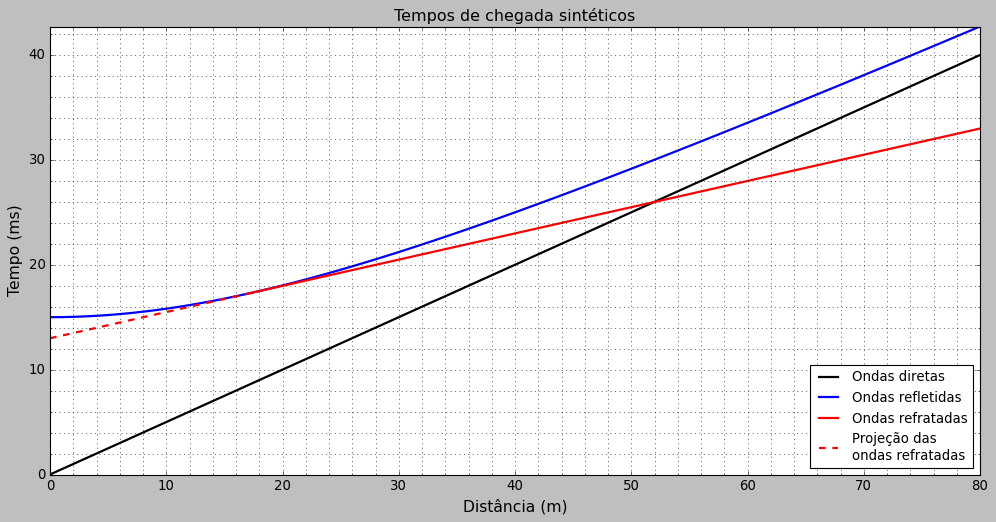

In [8]:
refracao_sintetico(v1=2000, v2=4000, z=15.0, n_tracos=81.0)

Identifique o tempo de interceptação, a distância crítica, distância de cruzamento e velocidades das camadas v1 e v2 a partir do gráfico acima. 

* Quando a velocidade da segunda camada é configurada para um valor menor do que a velocidade da primeira camada ocorre uma mensagem de erro e as ondas refratadas não são exibidas no gráfico. Por quê?

* O que acontece quando a velocidade da segunda camada é configurada para um valor igual ao da velocidade da primeira camada? Por quê? 

### Análise de tempos de chegada no sismograma de refração

A célula abaixo mostra um sismograma adaptado de Milkereit et al. (1985) em que é possível identificar duas camadas a partir dos tempos de chegada das ondas refratadas. É possível alterar os valores de velocidade da primeira camada ($v_{1}$), da segunda camada ($v_{1}$) e da profundidade da interface ($z$) para ajustar retas que indiquem a chegada das ondas diretas e a chegada das ondas refratadas na interface. 

Modifique estes valores e execute a célula para verificar o ajuste.

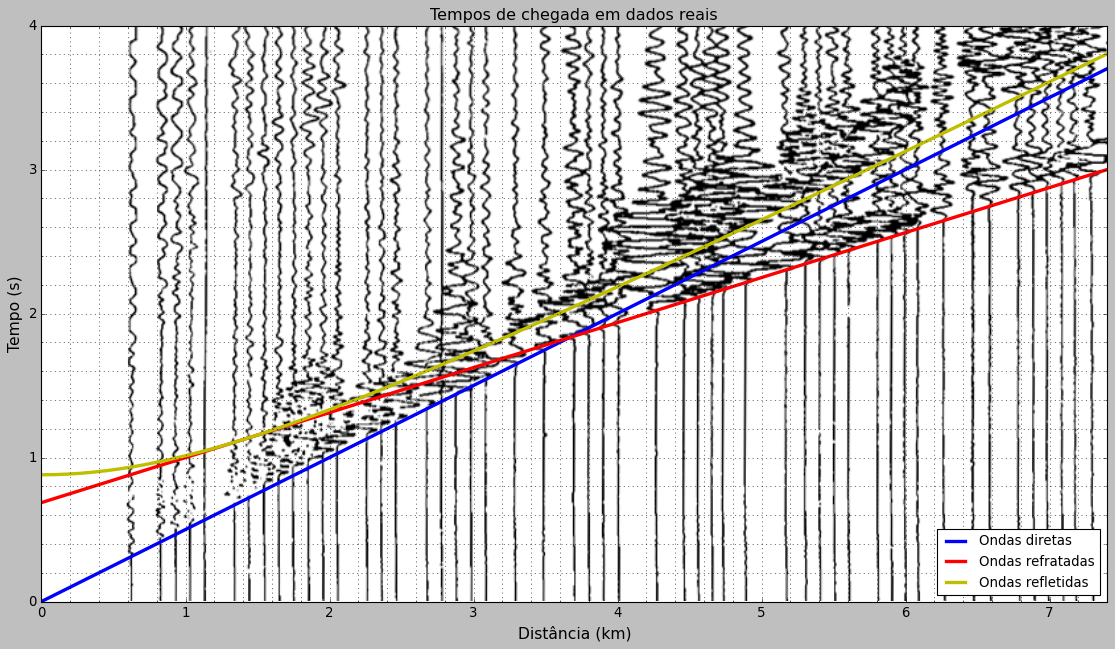

In [13]:
v_direta, h = refracao_real(v1=2.0, v2=3.2, z=0.88, reflexao=True)

Após conseguir um ajuste satisfatório altere o valor da variável $reflexao$ para **True** na célula acima. Isto irá mostrar os tempos de chegada das ondas refletidas no sismograma. Você conseguia identificá-las no sismograma antes desta alteração?

# Passo 03 - Análise de velocidades em reflexão (Método $t^2 x^2$)

A análise de velocidade das ondas sísmicas também pode ser feita a partir da análise dos tempos de chegada das ondas refletidas na interface. Uma das formas de se fazer isso é utiizando o método $t^2 x^2$, em que calcula-se os valores quadráticos dos tempos e das dstâncias a fim de linearizar a hipérbole característica relacionada aos tempo de chegada de uma reflexão em uma interface. A partir da reta gerada é possível estimar a velocidade de propagação das ondas sísmicas na primeira interface através da raiz quadrática do inverso do coeficiente angular, de forma parecida com o que é feito na análise de refração sísmica. 

A célula abaixo executa este procedimento para linearizar a hipérbole de reflexão observada no gráfico anterior. Execute-a sem alterar nada, calcule a velocidade estimada através do método $t^2 x^2$ e compare-a com a velocidade ajustada anteriormente com as retas referentes aos tempos de chegada das ondas refratadas.

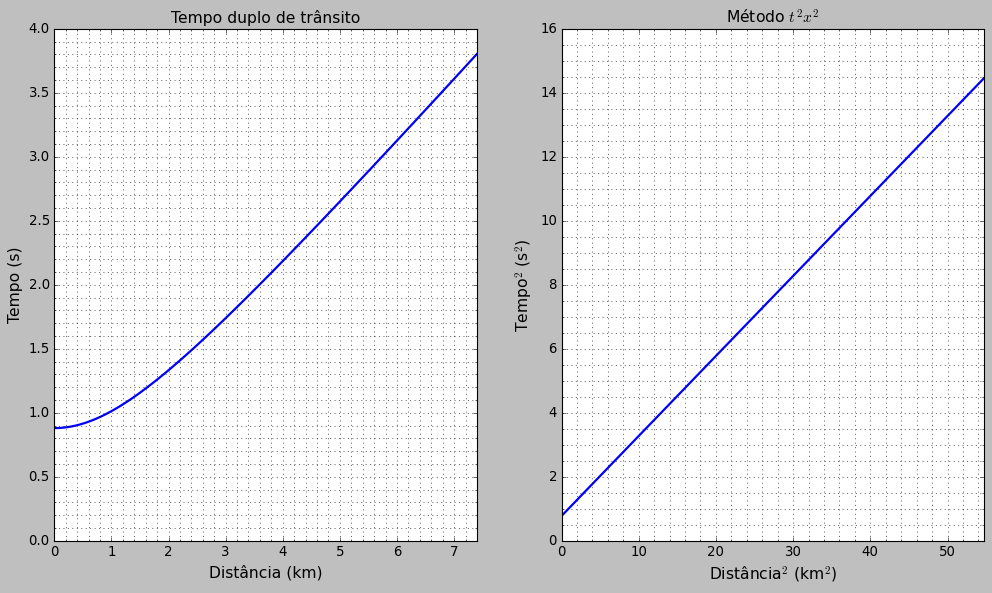

In [4]:
t2x2(v_direta, h)

### Análise de velocidades em reflexões de múltiplas interfaces

Quando se faz a análise dos tempos de chegada de reflexões ou refrações provenientes de um modelo de múltiplas camadas é necessário considerar que o tempo de trânsito apresentado pela reflexão ou refração das ondas sísmicas na interface superior da $n$-ésima camada é afetado pela velocidade de propagação destas ondas nas $n$-1 camadas existentes acima dela. O método $t^2 x^2$ fornece um meio de estimar a velocidade linearizando as curvas provenientes de todas as reflexões, porém esta estimativa só corresponde à velocidade real de propagação para a reflexão na primeira interface. Para as demais reflexões a velocidade estimada corresponde à *velocidade RMS*, que é a que considera a propagação das ondas através de todas as camadas acima da interface onde houve a reflexão. A velocidade real de uma determinada camada, ou a *velocidade intervalar*, é calculada através da fórmula de Dix.

A célula abaixo permite criar um gráfico com a representação dos tempos de chegada de reflexões em três interfaces distintas. As variáveis $v_{1}$, $v_{2}$ e $v_{3}$ correspondem às velocidades intervalares das camadas $1$, $2$ e $3$ respectivamente. Execute a para aplicar o método $t^2 x^2$ sobre as hiperboles representadas e, em seguida, estime as velocidades de cada uma das três camadas a partir do gráfico linearizado, observando a diferença nos valores obtidos em relação aos que foram inseridos no modelo.

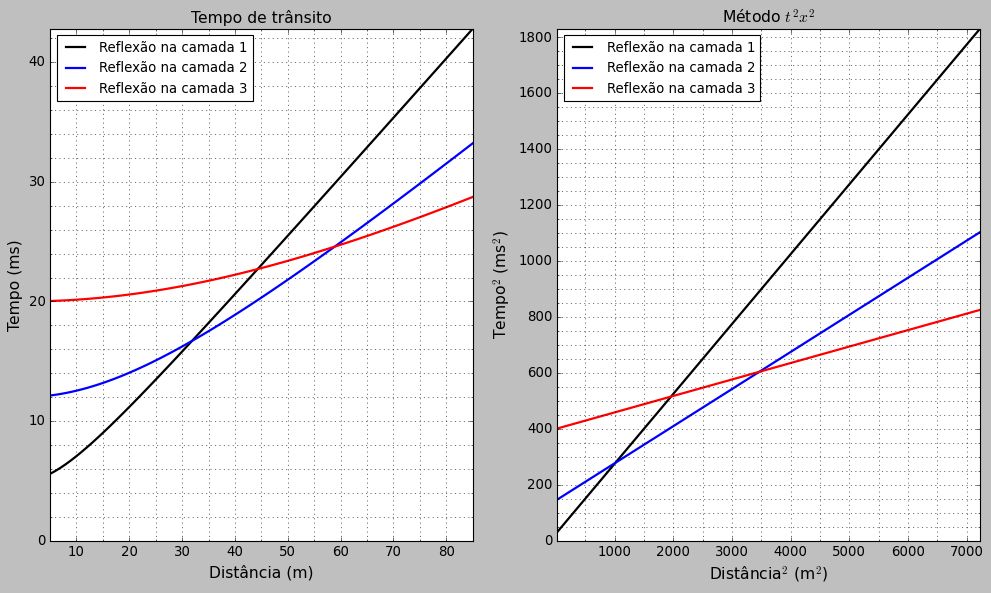

In [5]:
reflexao_sintetico(v1=2000, v2=3000, v3=5000, t01=5e-3, t02=12e-3, t03=20e-3, n_tracos=81)

Utilize os valores estimados para as velocidades RMS para obter os valores de velocidade intervalar para cada camada.

### Análise de tempos de chegada no sismograma de reflexão

A célula abaixo irá carregar um sismograma adaptado de Chen et al. (2018). Configure os valores de velocidade intervalar (variáveis $v_{1}$, $v_{2}$ e $v_{3}$) e os tempos iniciais de cada reflexão ($t_{0_{1}}$, $t_{0_{2}}$ e $t_{0_{3}}$) para ajustar as curvas de tempos de chegada sobre as hipérboles geradas pelas reflexões.

Execute a célula para obter o sismograma para o ajuste. A execução mostrará também um gráfico apenas com estas curvas, sem o sismograma (à esquerda), e outro com o método $t^2 x^2$ aplicado (à direita).

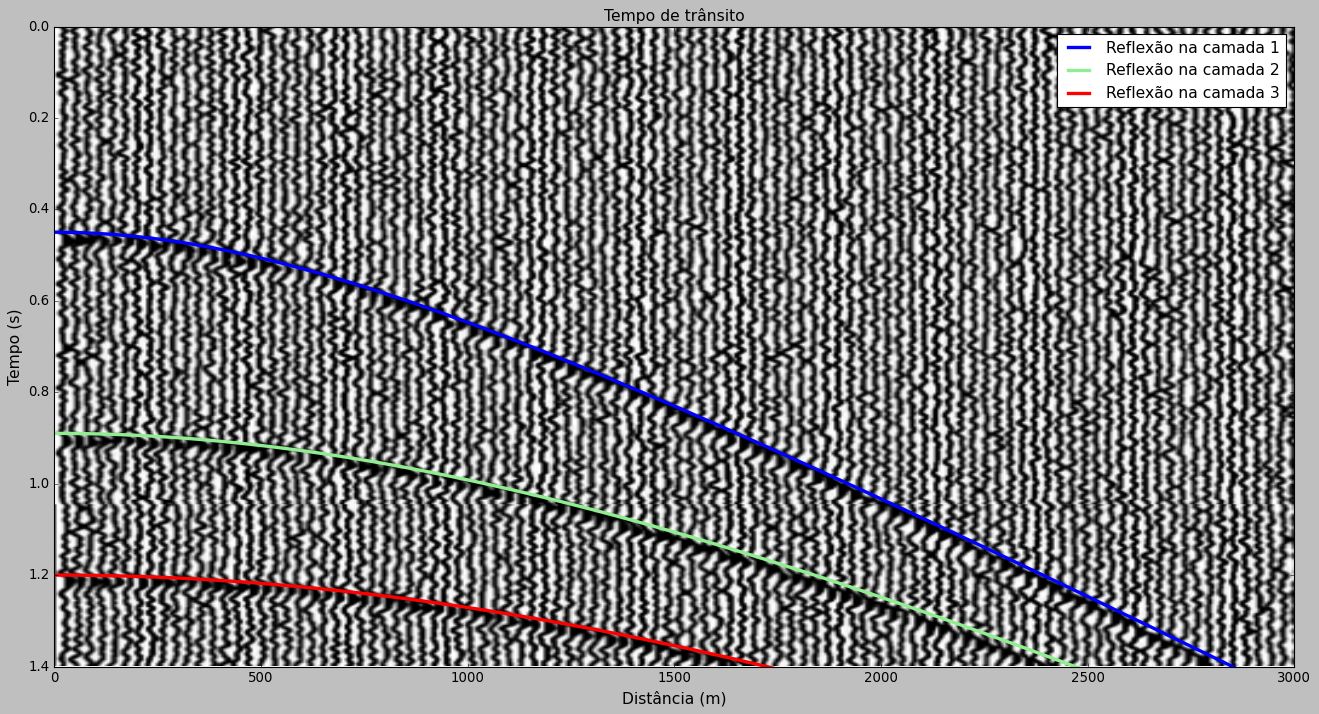

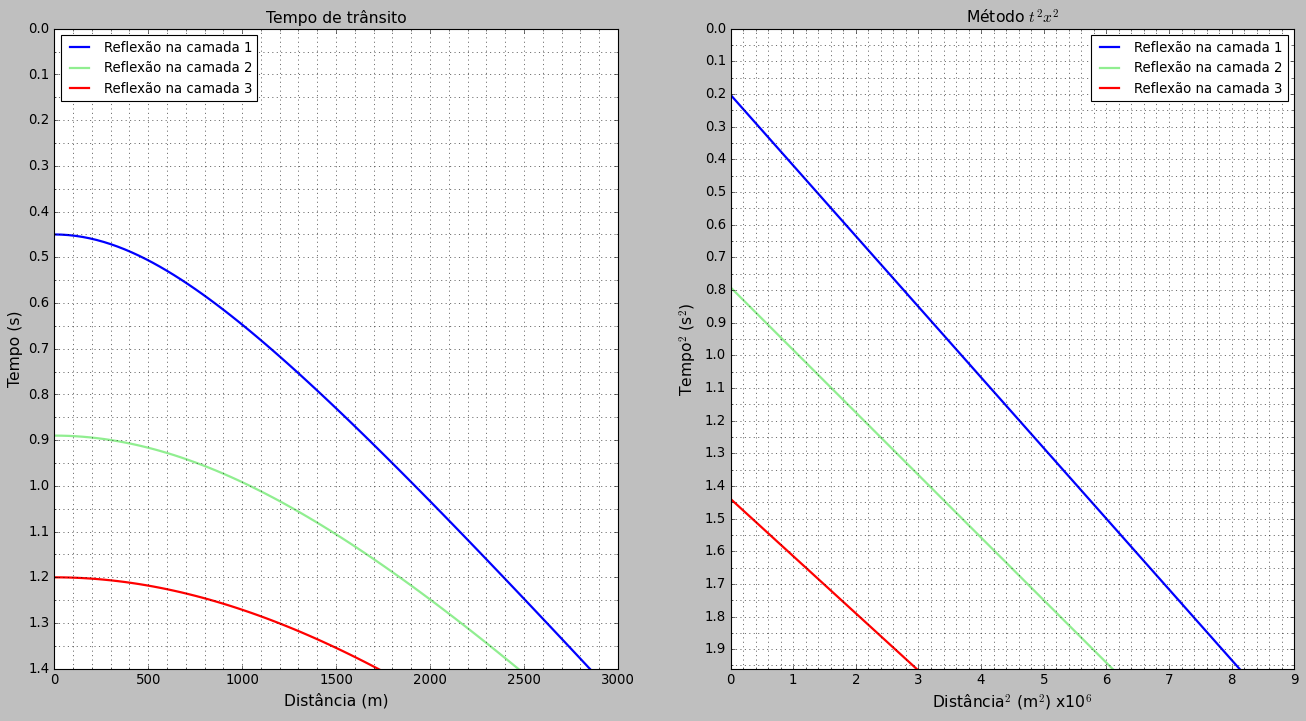

In [6]:
reflexao_sismograma(v1=2150, v2=2350, v3=2500, t01=0.45, t02=0.89, t03=1.2, n_tracos=81)

Estime as velocidades intervalares a partir do gráfico e veja se correspondem ao que você inseriu no modelo. Estime as espessuras das camadas.